In [34]:
import sys
sys.path.append('..')  # Go up one directory from notebooks/ to project root

from src.styles import style_config
import matplotlib.pyplot as plt

# Create scatter plot

Show all players on a scatter plot: xD per 90 v danger passes per 90

Text(0, 0.5, 'Legend')

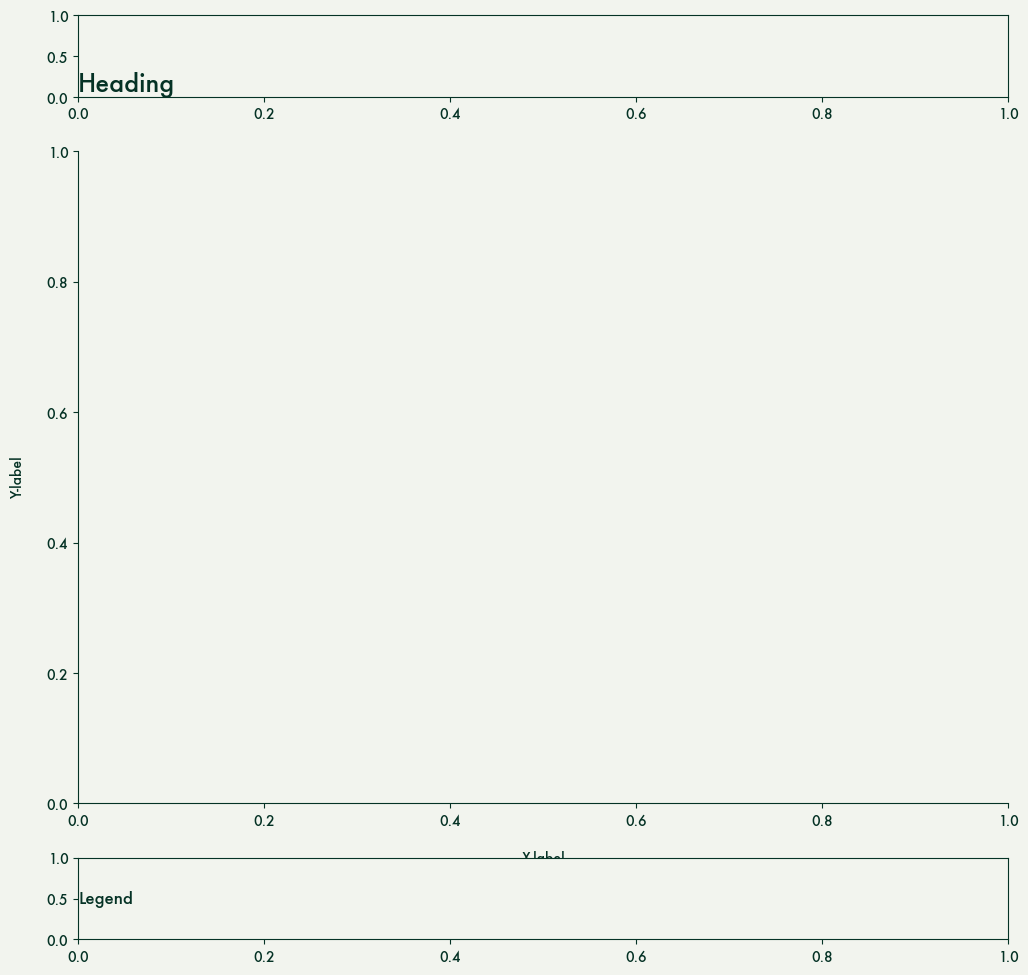

In [47]:
# Apply styling
plt.rcParams['font.family'] = style_config['font_prop'].get_name()
plt.rcParams.update({
    'text.color': style_config['colors']['dark'],
    'axes.labelcolor': style_config['colors']['dark'],
    'axes.edgecolor': style_config['colors']['dark'],
    'xtick.color': style_config['colors']['dark'],
    'ytick.color': style_config['colors']['dark'],
    'grid.color': style_config['colors']['dark'],
    'figure.facecolor': style_config['colors']['background'],
    'axes.facecolor': style_config['colors']['background'],
})

# Create figure
fig = plt.figure(figsize=(12, 12))
gs = fig.add_gridspec(3, 1, height_ratios=[0.1, 0.8, 0.1])      # 3 rows, 1 column, with height ratios for title, plot, legend

# Init axis
heading_ax = fig.add_subplot(gs[0])
main_ax = fig.add_subplot(gs[1])
legend_ax = fig.add_subplot(gs[2])

# Hide axis
# heading_ax.axis('off')
# legend_ax.axis('off')

# Hide spines
main_ax.spines['top'].set_visible(False)
main_ax.spines['right'].set_visible(False)

heading_ax.text(
    0, 0, 
    'Heading', 
    fontweight='bold', 
    fontsize=style_config['sizes']['h1'], 
    ha='left', 
    va='bottom'
)

main_ax.set_xlabel('X-label', labelpad=15)
main_ax.set_ylabel('Y-label', labelpad=15)

legend_ax.text(
    0, 0.5, 
    'Legend', 
    fontsize=style_config['sizes']['p'], 
    ha='left', 
    va='center'
)